In [17]:
import pystac_client
from dask.distributed import Client
from dcloader import DcLoader
import matplotlib.pyplot as plt


client = Client(processes=False, threads_per_worker=2, n_workers=3, memory_limit="12GB")
print(f"Dask dashboard link: {client.dashboard_link}")

eodc_catalog = pystac_client.Client.open("https://stac.eodc.eu/api/v1/")

time_range_pakistan = '2022-09-23T01:25:51Z/2022-09-23T01:25:52Z'
bounding_box_pakistan = [67.9, 27.0, 68.7, 27.8]

dc_loader = DcLoader(eodc_catalog)
pakistan_dc = dc_loader.load_GFM_data(time_range_pakistan, bounding_box_pakistan)

Dask dashboard link: http://10.5.0.2:8787/status
Persisting data cube to Dask cluster...
Data loaded successfully.


### Loading flood extent

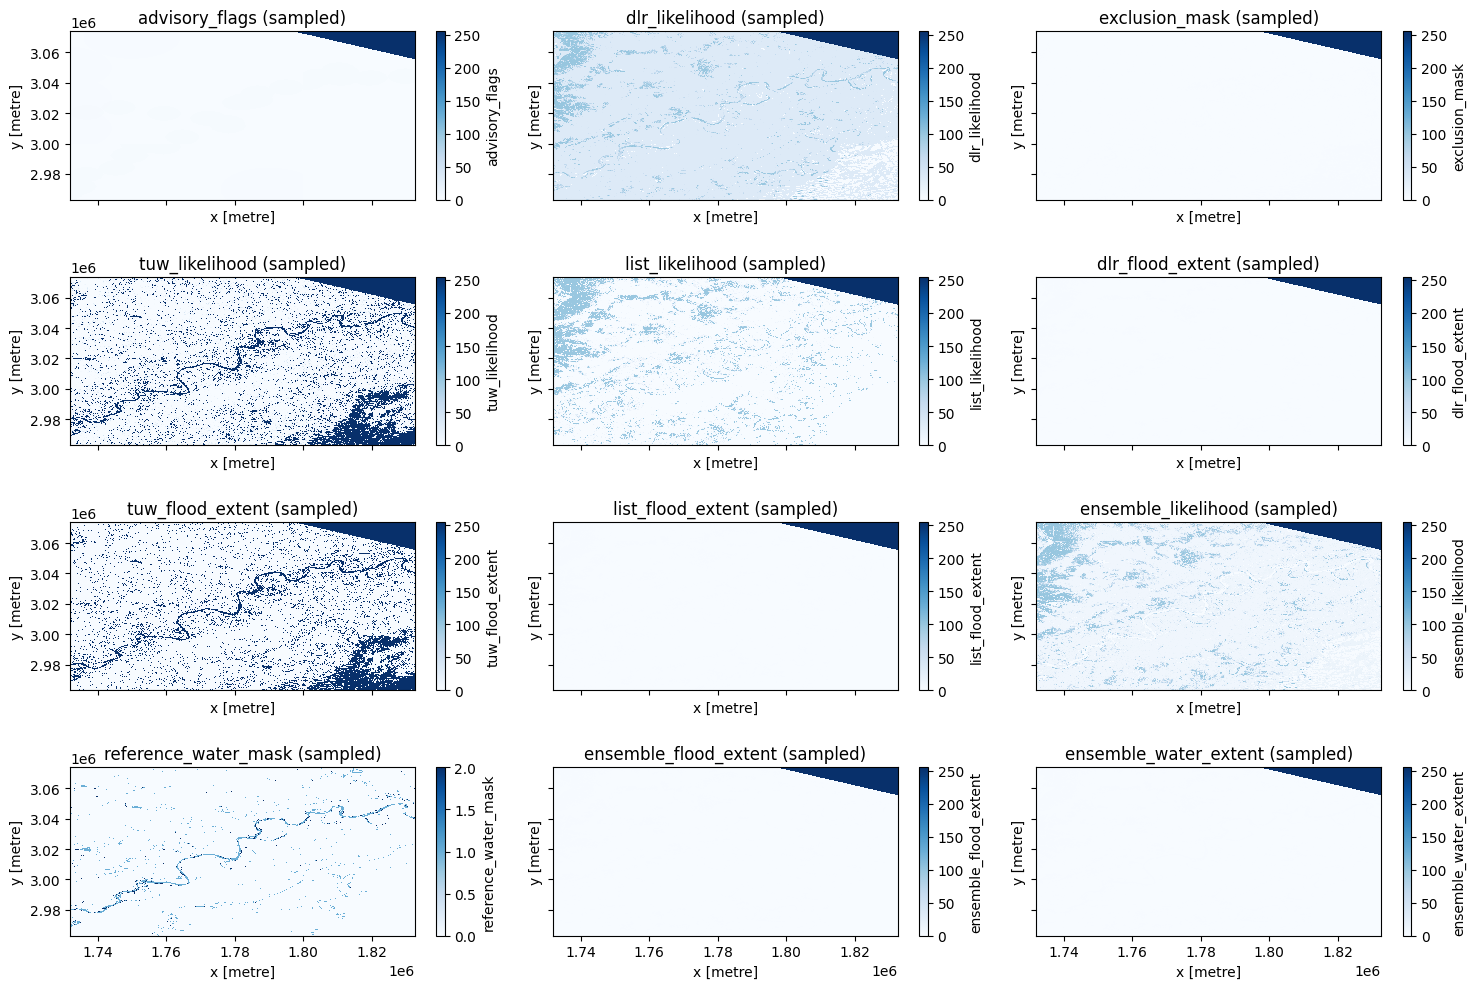

In [23]:
# Option 1: Sample every nth pixel for faster plotting
fig, ax = plt.subplots(4, 3, figsize=(15, 10), sharey=True, sharex=True)
band_names = list(pakistan_dc.data_vars.keys())  # First 3 bands only

for i, band_name in enumerate(band_names):
    sampled_data = pakistan_dc[band_name][0, ::4, ::4]
    col = i % 3
    row = i // 3
    sampled_data.plot(ax=ax[row, col], cmap='Blues')
    ax[row, col].set_title(f'{band_name} (sampled)')

plt.tight_layout()
plt.show()

In [16]:
# closing dask client
client.close()